# Ridge, Lasso Regression

In [2]:
#Boston Housing Dataset: Load the boston dataset.
import numpy as np
import pandas as pd

import pickle
with open('boston.pkl', 'rb') as file:
    boston = pickle.load(file)



boston.data = np.delete(boston.data, obj=11, axis=1)
boston.feature_names = np.delete(boston.feature_names, obj=11, axis=0)

In [3]:
#Creating feature and target arrays
X, y = boston.data, boston.target
columns = boston.feature_names

X=X[y<50]
y=y[y<50]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.3,
                                                    random_state=42)

## RIDGE REGRESSION

The first type of regularized regression that we'll look at is called ridge regression
in which our loss function is the standard OLS function plus the squared value of each coefficient
multipled by some constant alpha (L2 regularization term)

$\min_{w} || X w - y||_2^2 + \alpha ||w||_2^2$

When minimizing the loss function to fit to our data, models are penalized for
coefficients with a large magnitude: large positive and large negative coefficients

NOTE that alpha is a parameter that we need to choose in order to fit and predict
essentially, we can select the alpha for which our model performs best (hyper parameter tuning)

alpha controls model complexity
Notice that when alpha=0 we get back OLS (large coeff no penalized - overfitting problem is not accounted for)
Very high alpha can lead to underfitting the data (model too simple)
alpha controls regularization strength; must be a positive float.

Regularization improves the conditioning of the problem and reduces the variance of the estimates.
Larger values specify stronger regularization.

In [4]:
#DEFINE YOUR REGRESSOR and THE PARAMETERS GRID
from sklearn.linear_model import Ridge
import numpy as np

regressor = Ridge()

parameters = {"alpha": [1,10]}
#note that we set alpha using the argument alpha
#also notice the argument normalize: setting this equal to True ensures that all
#our variables are on the same scale

#DEFINE YOUR GRIDSEARCH
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(regressor, parameters, cv=3) #with no params it reduces to a CV

gs = gs.fit(X_train,y_train)

#summarize the results of your GRIDSEARCH
print('***GRIDSEARCH RESULTS***')
print("Best score: %f using %s" % (gs.best_score_, gs.best_params_))
means = gs.cv_results_['mean_test_score']
stds = gs.cv_results_['std_test_score']
params = gs.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

#test on hold-out
gs.score(X_test, y_test)

***GRIDSEARCH RESULTS***
Best score: 0.754699 using {'alpha': 1}
0.754699 (0.027964) with: {'alpha': 1}
0.749774 (0.024384) with: {'alpha': 10}


0.7444019597750846

In [5]:
#Independent term in the linear model.
print('Intercept: ', gs.best_estimator_.intercept_)

import pandas as pd
pd.DataFrame(list(zip(columns,gs.best_estimator_.coef_)), columns = ['features','estimatedCoefficients'])

Intercept:  35.77105149474532


,features,estimatedCoefficients
0,CRIM,-0.138367
1,ZN,0.041249
2,INDUS,-0.090450
3,CHAS,0.061085
4,NOX,-7.614171
5,RM,3.311549
6,AGE,-0.027356
7,DIS,-1.285788
8,RAD,0.206667
9,TAX,-0.013504


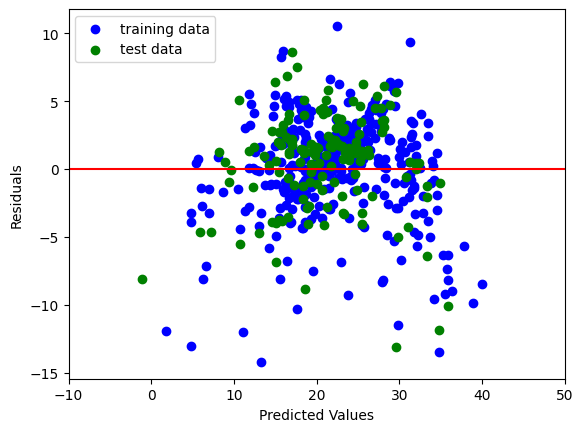

In [6]:
error_train=gs.predict(X_train)-y_train
error_test=gs.predict(X_test)-y_test

%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(gs.predict(X_train),error_train, c="b", label="training data")
plt.scatter(gs.predict(X_test),error_test, c="g", label="test data")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.legend(loc="upper left")
plt.hlines(y=0, xmin=-10, xmax=50, color="r")
plt.xlim([-10,50])
plt.show()

In [7]:
from sklearn import metrics

print("MAE train: ", metrics.mean_absolute_error(y_train, gs.predict(X_train)))
print("MSE train: ",metrics.mean_squared_error(y_train, gs.predict(X_train)))
print("RMSE train: ",np.sqrt(metrics.mean_squared_error(y_train, gs.predict(X_train))))
print("r2: ",np.sqrt(metrics.r2_score(y_train, gs.predict(X_train))))

print("MAE test: ", metrics.mean_absolute_error(y_test, gs.predict(X_test)))
print("MSE test: ",metrics.mean_squared_error(y_test, gs.predict(X_test)))
print("RMSE test: ",np.sqrt(metrics.mean_squared_error(y_test, gs.predict(X_test))))
print("r2: ",np.sqrt(metrics.r2_score(y_test, gs.predict(X_test))))

MAE train:  2.868898885436861
MSE train:  14.733424807780015
RMSE train:  3.8384143611366417
r2:  0.8790715721176459
MAE test:  2.8437070753055345
MSE test:  13.420850912737503
RMSE test:  3.663447954146135
r2:  0.862787320128828


## Lasso Regression

Lasso used the L1 penalty to regularize, while ridge used the L2 penalty.

$ \min_{w} ||X w - y||_2 ^ 2 + \alpha ||w||_1 $

In [8]:

#DEFINE YOUR REGRESSOR and THE PARAMETERS GRID
from sklearn.linear_model import Lasso
import numpy as np

regressor = Lasso()
parameters = {"alpha": [1,10]}

#DEFINE YOUR GRIDSEARCH
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(regressor, parameters, cv=3) #with no params it reduces to a CV

gs = gs.fit(X_train,y_train)

lasso_coef = gs.best_estimator_.coef_
print(lasso_coef)

#summarize the results of your GRIDSEARCH
print('***GRIDSEARCH RESULTS***')
print("Best score: %f using %s" % (gs.best_score_, gs.best_params_))
means = gs.cv_results_['mean_test_score']
stds = gs.cv_results_['std_test_score']
params = gs.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

#test on hold-out
gs.score(X_test, y_test)

[-0.09978993  0.04048744 -0.11368776  0.         -0.          0.1337149
  0.         -0.64961496  0.17673584 -0.01428563 -0.54275773 -0.60131096]
***GRIDSEARCH RESULTS***
Best score: 0.689309 using {'alpha': 1}
0.689309 (0.034246) with: {'alpha': 1}
0.562273 (0.020485) with: {'alpha': 10}


0.6639200504153424

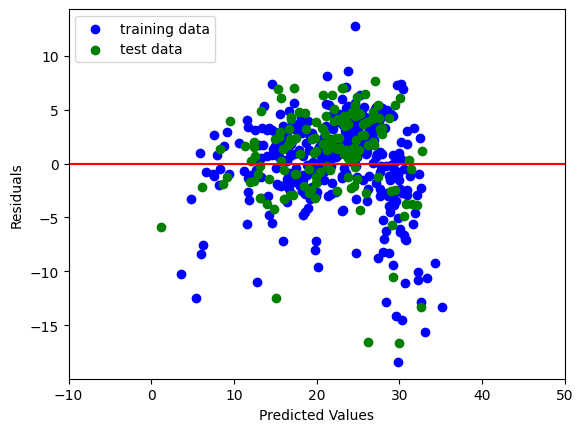

In [9]:
error_train=gs.predict(X_train)-y_train
error_test=gs.predict(X_test)-y_test

plt.scatter(gs.predict(X_train),error_train, c="b", label="training data")
plt.scatter(gs.predict(X_test),error_test, c="g", label="test data")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.legend(loc="upper left")
plt.hlines(y=0, xmin=-10, xmax=50, color="r")
plt.xlim([-10,50])
plt.show()

In [10]:
from sklearn import metrics

print("MAE train: ", metrics.mean_absolute_error(y_train, gs.predict(X_train)))
print("MSE train: ",metrics.mean_squared_error(y_train, gs.predict(X_train)))
print("RMSE train: ",np.sqrt(metrics.mean_squared_error(y_train, gs.predict(X_train))))
print("r2: ",np.sqrt(metrics.r2_score(y_train, gs.predict(X_train))))

print("MAE test: ", metrics.mean_absolute_error(y_test, gs.predict(X_test)))
print("MSE test: ",metrics.mean_squared_error(y_test, gs.predict(X_test)))
print("RMSE test: ",np.sqrt(metrics.mean_squared_error(y_test, gs.predict(X_test))))
print("r2: ",np.sqrt(metrics.r2_score(y_test, gs.predict(X_test))))

MAE train:  3.2730482159304555
MSE train:  19.045566910726137
RMSE train:  4.364122696571
r2:  0.8403932353050991
MAE test:  3.2149534869113223
MSE test:  17.64676636083358
RMSE test:  4.200805441916298
r2:  0.8148128928872826


In [11]:
#Independent term in the linear model.
print('Intercept: ', gs.best_estimator_.intercept_)

import pandas as pd
pd.DataFrame(list(zip(columns,gs.best_estimator_.coef_)), columns = ['features','estimatedCoefficients'])

Intercept:  46.70461534840557


,features,estimatedCoefficients
0,CRIM,-0.099790
1,ZN,0.040487
2,INDUS,-0.113688
3,CHAS,0.000000
4,NOX,-0.000000
5,RM,0.133715
6,AGE,0.000000
7,DIS,-0.649615
8,RAD,0.176736
9,TAX,-0.014286
